In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
pip install bs4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup

In [4]:
pip install wget

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install requests

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install os

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [7]:
CLIENT_ID = '0LD0U4QK4RI3ULXDTA4Q2JO22LGCWM5X2454AQXQRRF0RXO4' # your Foursquare ID
CLIENT_SECRET = 'RZOJASPIAIKIMUUD40K4XLIB2XPM324K0WNFBIKJJPRS5H0L' # your Foursquare Secret
ACCESS_TOKEN = 'CKC3KNWDWBDJMDMBH02MOMFWIWLCJXE2BAUYU1DWPMXYELLC' # your FourSquare Access Token
VERSION = '20201231'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0LD0U4QK4RI3ULXDTA4Q2JO22LGCWM5X2454AQXQRRF0RXO4
CLIENT_SECRET:RZOJASPIAIKIMUUD40K4XLIB2XPM324K0WNFBIKJJPRS5H0L


In [8]:
address = 'Johannesburg'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.205 28.049722


In [9]:
radius = 2200
Limit = 300
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, Limit)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60a09903d28b4e1c15db5d96'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'City and Suburban',
  'headerFullLocation': 'City and Suburban, Johannesburg',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': -26.18519998019998,
    'lng': 28.071748988335646},
   'sw': {'lat': -26.224800019800018, 'lng': 28.027695011664353}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b20a387f964a520913324e3',
       'name': 'Arts on Main',
       'location': {'address': 'The Maboneng Precinct',
        'crossStreet': '264 Fox Street',
        'lat': -26.204477279064204,
        'lng': 28.057891903407125,

In [10]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b20a387f964a520913324e3',
  'name': 'Arts on Main',
  'location': {'address': 'The Maboneng Precinct',
   'crossStreet': '264 Fox Street',
   'lat': -26.204477279064204,
   'lng': 28.057891903407125,
   'labeledLatLngs': [{'label': 'display',
     'lat': -26.204477279064204,
     'lng': 28.057891903407125}],
   'distance': 818,
   'postalCode': '2094',
   'cc': 'ZA',
   'neighborhood': 'Johann',
   'city': 'EGoli',
   'state': 'IGauteng',
   'country': 'iNingizimu Afrika',
   'formattedAddress': ['The Maboneng Precinct (264 Fox Street)',
    'EGoli',
    '2094',
    'iNingizimu Afrika']},
  'categories': [{'id': '507c8c4091d498d9fc8c67a9',
    'name': 'Public Art',
    'pluralName': 'Public Art',
    'shortName': 'Public Art',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     's

In [11]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


#flatten JSON, Normalize JSON to Dataframe
dataframe = pd.json_normalize (items) 


# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']

nearby = dataframe.loc[:, filtered_columns]


# filter the category for each row
nearby['venue.categories'] = nearby.apply(get_category_type, axis=1)


# clean columns
nearby.columns = [col.split('.')[-1] for col in nearby.columns]


#replce NaN values with Not found in address
nearby['address'] = nearby['address'].fillna("Not found")
nearby.head(10)      


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Arts on Main,Public Art,The Maboneng Precinct,264 Fox Street,-26.204477,28.057892,"[{'label': 'display', 'lat': -26.2044772790642...",818,2094,ZA,Johann,EGoli,IGauteng,iNingizimu Afrika,"[The Maboneng Precinct (264 Fox Street), EGoli...",4b20a387f964a520913324e3
1,Market On Main,Flea Market,The Maboneng Precinct,245 Main Street,-26.204473,28.057913,"[{'label': 'display', 'lat': -26.2044729842714...",820,2094,ZA,Johann,EGoli,IGauteng,iNingizimu Afrika,"[The Maboneng Precinct (245 Main Street), EGol...",4d4533de1b62b1f75821fbe2
2,Little Addis Café,Ethiopian Restaurant,280 Fox Street,at Kruger St.,-26.204145,28.059270,"[{'label': 'display', 'lat': -26.2041445333674...",958,2094,ZA,Joh,EGoli,IGauteng,iNingizimu Afrika,"[280 Fox Street (at Kruger St.), EGoli, 2094, ...",502e8685e4b04d70bdee4bf1
3,Hallmark House,Hotel,54 Siemert Road,NaN,-26.199548,28.055922,"[{'label': 'display', 'lat': -26.1995483625970...",867,2094,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[54 Siemert Road, EGoli, 2094, iNingizimu Afrika]",58933c31d8f3e92fa7301d2e
4,Cramers Coffee,Coffee Shop,17 Harrison St. Marshalltown,at Main St.,-26.206956,28.040580,"[{'label': 'display', 'lat': -26.2069558642014...",938,2094,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[17 Harrison St. Marshalltown (at Main St.), E...",4c73ac6bad69b60c569c86b9
5,Rand Club,Historic Site,Loveday St.,NaN,-26.205881,28.041334,"[{'label': 'display', 'lat': -26.2058813494203...",843,2001,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[Loveday St., EGoli, 2001, iNingizimu Afrika]",4df202a152b100c2d7f44f15
6,The Bioscope,Indie Movie Theater,286 Fox St.,NaN,-26.204107,28.059538,"[{'label': 'display', 'lat': -26.2041068038324...",985,2094,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[286 Fox St., EGoli, 2094, iNingizimu Afrika]",4c4c586d9e6dbe9a770c5a0d
7,Curiocity Backpackers,Hostel,Not found,NaN,-26.203955,28.061417,"[{'label': 'display', 'lat': -26.2039549739632...",1173,2043,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[EGoli, 2043, iNingizimu Afrika]",527e7a98498e6c7e20141a24
8,Living Room,Restaurant,5th Floor 20 Kruger St,Fox St,-26.204396,28.059207,"[{'label': 'display', 'lat': -26.2043964080460...",949,2094,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[5th Floor 20 Kruger St (Fox St), EGoli, 2094,...",50155084e4b034c3e09181eb
9,Sharp! Braai Corner,BBQ Joint,The Maboneng Precinct,Fox Street,-26.204401,28.059102,"[{'label': 'display', 'lat': -26.2044013089991...",939,NaN,ZA,NaN,EGoli,IGauteng,iNingizimu Afrika,"[The Maboneng Precinct (Fox Street), EGoli, iN...",4fdddddde4b049c33be2a337


In [12]:
nearby.shape

(100, 16)

In [13]:
Business_type = nearby['categories']


In [57]:
Business_group = nearby['categories'].value_counts()
Business_group

Coffee Shop               13
Fast Food Restaurant      11
Café                       7
Hotel                      5
Art Gallery                4
Breakfast Spot             3
Portuguese Restaurant      3
Bar                        3
African Restaurant         2
Theater                    2
Grocery Store              2
Deli / Bodega              2
Flea Market                2
Bistro                     2
Asian Restaurant           2
Nightclub                  2
Plaza                      2
Historic Site              2
Music Venue                2
Shopping Mall              2
Fried Chicken Joint        2
Seafood Restaurant         1
Mexican Restaurant         1
Public Art                 1
Department Store           1
Lounge                     1
Performing Arts Venue      1
Boutique                   1
Rugby Pitch                1
Beach                      1
Stadium                    1
Ethiopian Restaurant       1
BBQ Joint                  1
Burger Joint               1
Hostel        

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:

body = client_ab1ea419e13946d990816461a4d71eaa.get_object(Bucket='courseracapstone-donotdelete-pr-w1liqxgnw7wr1y',Key='metropolitan_suburbs_region.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,the_geom,cartodb_id,subplace_c,province,wardid,district_m,local_muni,main_place,mp_class,sp_name,suburb_nam,metro,african,white,asian,coloured,other,totalpop
0,0106000020E61000000100000001030000000100000044...,1,761001001,Gauteng,74202012.0,Sedibeng,Midvaal,Alberton,Settlement,Brenkondown,Brenkondown,Johannesburg,330,24,0,2,0,356
1,0106000020E6100000010000000103000000010000000B...,2,762008001,Gauteng,74203010.0,Sedibeng,Lesedi,Duduza,Settlement,Masetjhaba View,Masetjhaba View,Johannesburg,192,2,0,0,0,194
2,0106000020E6100000010000000103000000010000002F...,3,762009001,Gauteng,74203010.0,Sedibeng,Lesedi,Sonstraal,Settlement,Sonstraal AH,Sonstraal AH,Johannesburg,90,9,0,2,0,101
3,0106000020E61000000100000001030000000100000037...,19,763004010,Gauteng,74801023.0,West Rand,Mogale City,Krugersdorp,Small City,Ruimsig Noord,Ruimsig Noord,Johannesburg,867,361,5,14,2,1250
4,0106000020E61000000100000001030000000100000018...,242,797008046,Gauteng,79700035.0,Ekurhuleni,Ekurhuleni,Germiston,Metro,Germiston Ext 3,Germiston Ext 3,Johannesburg,1,0,0,0,0,1


In [17]:
df_data_1.shape

(3598, 18)

In [18]:
sa_data = df_data_1

In [19]:
joburg_data= sa_data[sa_data['province']=="Gauteng"]

In [58]:
joburg_data.shape

(1885, 18)

In [21]:
joburg_var = joburg_data.drop(['the_geom', 'cartodb_id', 'subplace_c', 'wardid'],axis=1)

In [22]:
joburg_data_distr = joburg_var[joburg_var['district_m']=="City of Johannesburg"]

In [23]:
joburg_data_distr.set_index(['province'], inplace=True)

In [24]:
joburg_data_distr

,district_m,local_muni,main_place,mp_class,sp_name,suburb_nam,metro,african,white,asian,coloured,other,totalpop
province,,,,,,,,,,,,,
Gauteng,City of Johannesburg,City of Johannesburg,Sandton,Metro,Lone Hill,Lone Hill,Johannesburg,2581,8001,654,232,245,11712
Gauteng,City of Johannesburg,City of Johannesburg,Sandton,Metro,Bryanston,Bryanston,Johannesburg,9187,18372,1503,657,499,30218
Gauteng,City of Johannesburg,City of Johannesburg,Sandton,Metro,Woodmead,Woodmead,Johannesburg,1256,2686,348,76,74,4439
Gauteng,City of Johannesburg,City of Johannesburg,Sandton,Metro,Edenburg,Edenburg,Johannesburg,1470,2282,498,155,114,4519
Gauteng,City of Johannesburg,City of Johannesburg,Sandton,Metro,Sandown,Sandown,Johannesburg,3054,3383,1528,254,281,8500
Gauteng,City of Johannesburg,City of Johannesburg,Alexandra,Metro,Far East Bank Ext,Far East Bank Ext,Johannesburg,3477,0,1,4,8,3491
Gauteng,City of Johannesburg,City of Johannesburg,Johannesburg,Metro,Fairwood,Fairwood,Johannesburg,136,217,15,0,0,368
Gauteng,City of Johannesburg,City of Johannesburg,Johannesburg,Metro,Comptonville,Comptonville,Johannesburg,398,52,17,136,2,605
Gauteng,City of Johannesburg,City of Johannesburg,Randburg,Metro,Vandia Grove,Vandia Grove,Johannesburg,125,264,11,5,11,416


In [25]:
Main_place = joburg_data_distr['main_place'].value_counts()


In [26]:
Main_place

Johannesburg               223
Randburg                   100
Soweto                      93
Alexandra                   78
Roodepoort                  67
Sandton                     61
Ennerdale                   13
Lenasia                     13
Lenasia South                7
Dainfern                     3
City of Johannesburg NU      3
Lawley                       2
Chartwell                    2
Lanseria                     2
Kanana Park                  2
Lehae                        1
Zakariyya Park               1
Millgate Farm                1
Zevenfontein                 1
Kagiso                       1
Lucky 7                      1
Farmall                      1
Midrand                      1
Malatjie                     1
Diepsloot                    1
Itsoseng                     1
Rietfontein                  1
Vlakfontein                  1
Randfontein                  1
Tshepisong                   1
Name: main_place, dtype: int64

In [27]:
Main_class = joburg_data_distr['mp_class'].value_counts()


In [28]:
Main_class

Metro    684
Name: mp_class, dtype: int64

In [29]:
Main_surbubrs = joburg_data_distr['suburb_nam'].value_counts()

In [30]:
Main_surbubrs

Alexandra Ext 61                              1
Ennerdale Ext 9                               1
Jabavu                                        1
Sydenham                                      1
Far East Bank Ext 1                           1
Woodmead                                      1
Nancefield                                    1
Bramley                                       1
Cottesloe                                     1
Selwyn                                        1
Dewetshof                                     1
Rossmore                                      1
Hopefield Informal                            1
Denver                                        1
Lorentzville                                  1
Paarlshoop                                    1
Bordeaux                                      1
Radiokop                                      1
Alexandra Ext 47                              1
Longmeadow Business Estate                    1
Mofolo South                            

In [31]:
columns = ['main_place','african','white','asian','coloured','other','totalpop']    
joburg_pop_split = joburg_data_distr[columns]

In [32]:
joburg_pop=joburg_pop_split[joburg_pop_split['main_place']=="Johannesburg"]

In [33]:
joburg_pop

,main_place,african,white,asian,coloured,other,totalpop
province,,,,,,,
Gauteng,Johannesburg,136,217,15,0,0,368
Gauteng,Johannesburg,398,52,17,136,2,605
Gauteng,Johannesburg,236,428,23,13,4,704
Gauteng,Johannesburg,888,388,137,81,26,1521
Gauteng,Johannesburg,293,0,0,0,15,308
Gauteng,Johannesburg,60,65,11,6,0,142
Gauteng,Johannesburg,2268,1191,380,154,26,4019
Gauteng,Johannesburg,460,109,52,20,2,643
Gauteng,Johannesburg,0,0,0,0,0,0


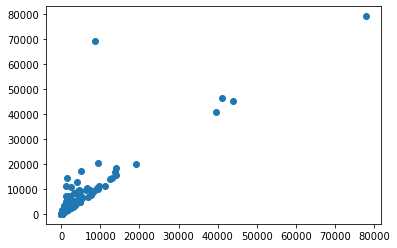

In [34]:
x=joburg_pop.african, 
y = joburg_pop.totalpop
plt.scatter(x, y)

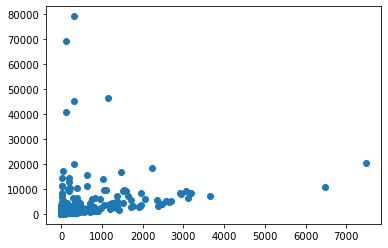

In [35]:
x=joburg_pop.white, 
y = joburg_pop.totalpop
plt.scatter(x, y)

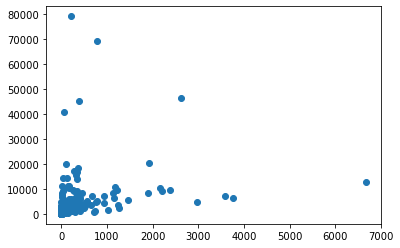

In [36]:
x=joburg_pop.asian, 
y = joburg_pop.totalpop
plt.scatter(x, y)

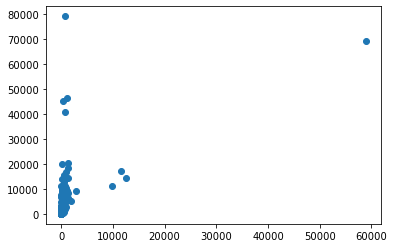

In [37]:
x=joburg_pop.coloured, 
y = joburg_pop.totalpop
plt.scatter(x, y)

In [38]:
pip install opencage

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [39]:
address = 'Ennerdale'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.4149377 27.8463264


In [40]:
address = 'Johannesburg'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.205 28.049722


In [41]:
address = 'Randburg'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.096111 27.975


In [42]:
address = 'Soweto'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.2227778 27.89


In [43]:
address = 'Alexandra, ZA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.104444 28.098889


In [44]:
address = 'Roodepoort'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.1563889 27.8858333


In [45]:
address = 'Sandton'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.0682406 28.0479844


In [46]:
address = 'Lenasia'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


-26.3196311 27.8244324


In [47]:
address = 'Lenasia South' 
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.3919444 27.8530556


In [48]:
column = ['Surburb', 'latitude', 'longitude']

In [49]:
surburs_in_jhb =pd.DataFrame(columns=column)

In [50]:
surburs_in_jhb

,Surburb,latitude,longitude


In [51]:
surburs_in_jhb['Surburb'] = (1,2,3,4,5,6,7,8,9)
surburs_in_jhb['latitude'] = (-26.4149377,-26.205,-26.096111,-26.2227778,-26.104444,-26.1563889,-26.0682406,-26.3196311, -26.3919444)
surburs_in_jhb['longitude'] = (27.8463264, 28.049722, 27.975, 27.89, 28.098889, 27.8858333, 28.0479844,27.8244324, 27.8530556)

In [52]:
surburs_in_jhb

,Surburb,latitude,longitude
0,1,-26.414938,27.846326
1,2,-26.205000,28.049722
2,3,-26.096111,27.975000
3,4,-26.222778,27.890000
4,5,-26.104444,28.098889
5,6,-26.156389,27.885833
6,7,-26.068241,28.047984
7,8,-26.319631,27.824432
8,9,-26.391944,27.853056


In [53]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [54]:
address = 'Johannesburg'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-26.205 28.049722


In [55]:
import folium
map_joburg = folium.Map(location =[latitude, longitude], zoom_start = 10)

for latitude, longitude, Surburbs in zip(surburs_in_jhb['Surburb'],surburs_in_jhb['latitude'], surburs_in_jhb['longitude']):
    label= '{}', '{}'.format(Surburbs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        colour='red',
        fill=True,
        fill_color = '#318cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_joburg)
        
map_joburg

 